github url: https://github.com/Qornck/DataMining_1

or u can click here: [互评作业1](https://github.com/Qornck/DataMining_1)

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
print('数据集：Movies')
data = pd.read_csv('movies_dataset.csv', index_col=0)
print('属性类别数:', len(data.columns))
print('总行数:', len(data))
print('示例数据:')
data.head(5)

数据集：Movies
属性类别数: 14
总行数: 20548
示例数据:


,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman


In [54]:
print("数据预处理")
cols = ['downloads', 'views']
for col in cols:
    for i in range(len(data)):
        if type(data[col][i]) == str:
            data[col][i] = data[col][i].replace(',', '')
        data[col][i] = float(data[col][i])

for i in range(len(data)):
    if type(data['run_time'][i]) == str:
        if data['run_time'][i][-1] == 'h':
            hours = data['run_time'][i].split('h')[0]
            total = int(hours) * 60
            data['run_time'][i] = total
        elif data['run_time'][i][-1] == 'n':
            total = 0
            if 'h' in data['run_time'][i]:
                hours, minutes = data['run_time'][i].split('h')
                minutes = minutes.replace('min', '')
                hours = int(hours)
                minutes = int(minutes)
                total = hours * 60 + minutes
            else:
                total = data['run_time'][i].replace('min', '')
            data['run_time'][i] = total
        elif data['run_time'][i][-1] == 'm':
            total = 0
            if 'h' in data['run_time'][i]:
                hours, minutes = data['run_time'][i].split('h')
                minutes = minutes.replace('m', '')
                hours = int(hours)
                minutes = int(minutes)
                total = hours * 60 + minutes
            else:
                total = data['run_time'][i].replace('m', '')
            data['run_time'][i] = total
    data['run_time'][i] = float(data['run_time'][i])

data[cols] = data[cols].astype(np.float32)
data['run_time'] = data['run_time'].astype(np.float32)

数据预处理


In [55]:
print('提取每一列属性以及名称')
num_labels = data.select_dtypes(include=np.number).columns.values
nom_labels = data.select_dtypes(exclude=np.number).columns.values
print('标称属性:', nom_labels)
print('数值属性:', num_labels)
print(data.shape," ",nom_labels.shape," ",num_labels.shape)

提取每一列属性以及名称
标称属性: ['appropriate_for' 'director' 'industry' 'language' 'posted_date'
 'release_date' 'storyline' 'title' 'writer']
数值属性: ['IMDb-rating' 'downloads' 'id' 'run_time' 'views']
(20548, 14)   (9,)   (5,)


In [56]:
print('频数统计')
print('\n标称属性频数统计')

for label in nom_labels:
    print("label:", data[label].value_counts())

频数统计

标称属性频数统计
label: appropriate_for
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: count, dtype: int64
label: director
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shivani T

In [57]:
print('展示每一属性的5数统计')
data.describe()

展示每一属性的5数统计


,IMDb-rating,downloads,id,run_time,views
count,19707.000000,20547.000000,20548.000000,18780.000000,2.054700e+04
mean,5.762151,10795.240234,222351.199776,106.195953,3.559551e+04
std,1.374041,23716.207031,138422.327931,23.636484,6.247253e+04
min,1.100000,0.000000,1.000000,2.000000,6.670000e+02
25%,4.800000,855.500000,96122.250000,90.000000,7.571500e+03
50%,5.700000,2716.000000,264457.500000,100.000000,1.522200e+04
75%,6.600000,10070.000000,354561.250000,117.000000,3.657100e+04
max,9.900000,391272.000000,372092.000000,321.000000,1.638533e+06


In [58]:
print('对上面的数值属性进行缺失值统计：\n')
for label in num_labels:
    print(label,":",data[label].isnull().sum())

对上面的数值属性进行缺失值统计：

IMDb-rating : 841
downloads : 1
id : 0
run_time : 1768
views : 1


数据可视化：



<Axes: ylabel='appropriate_for'>

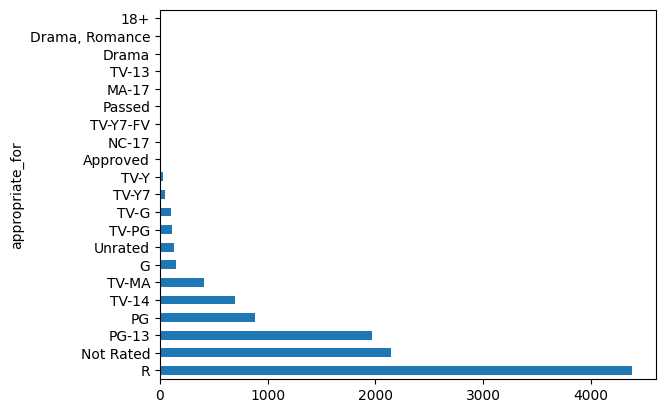

In [59]:
print('数据可视化：\n')
data[nom_labels[0]].value_counts().plot.barh()

IMDb-rating 直方图和Q-Q图:


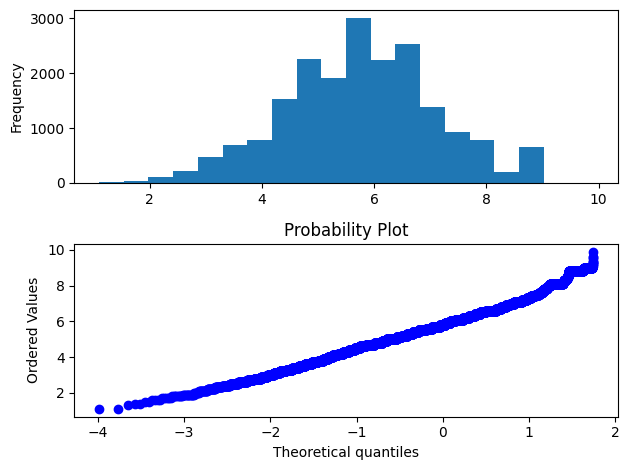

downloads 直方图和Q-Q图:


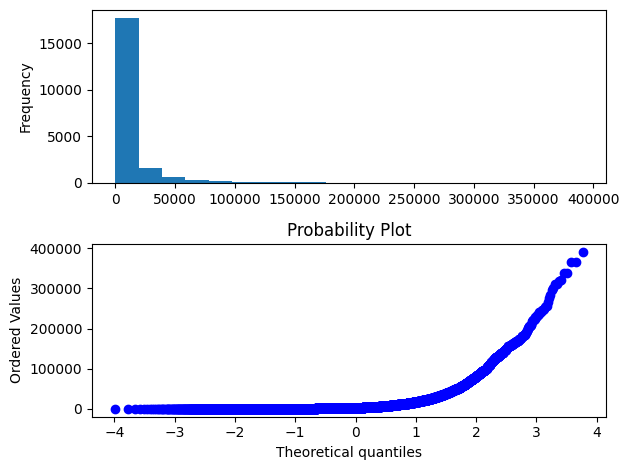

id 直方图和Q-Q图:


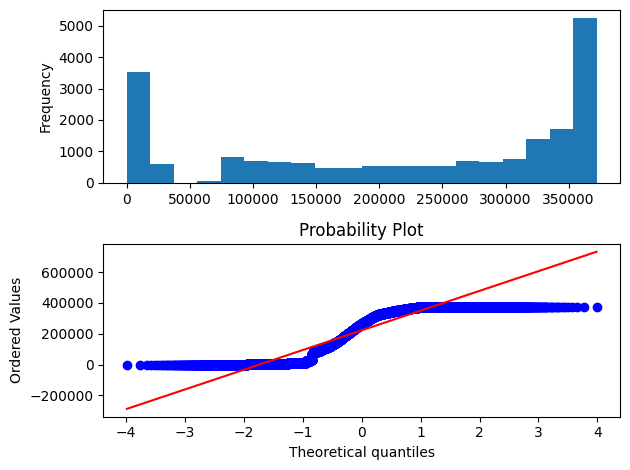

run_time 直方图和Q-Q图:


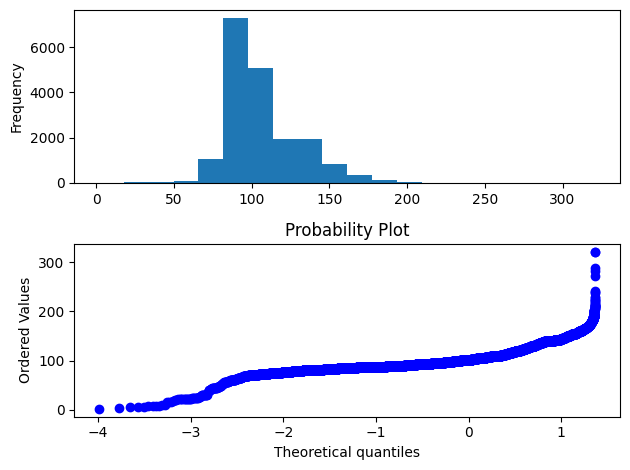

views 直方图和Q-Q图:


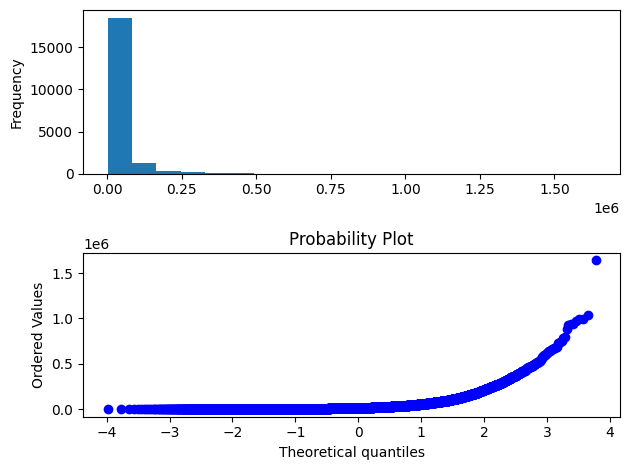

In [60]:
for label in num_labels:
    print(label, '直方图和Q-Q图:')
    plt.subplot(2, 1, 1)
    data[label].plot.hist(bins=20)
    plt.subplot(2, 1, 2)
    stats.probplot(data[label], plot=plt)
    # 调整子图间距
    plt.tight_layout()
    plt.show()

盒图



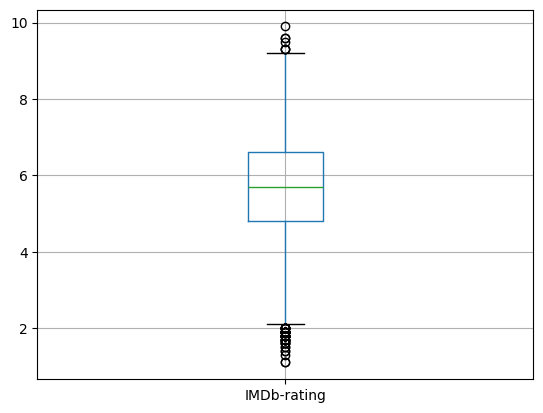

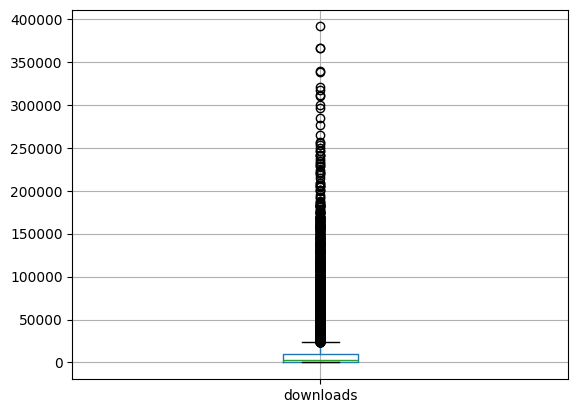

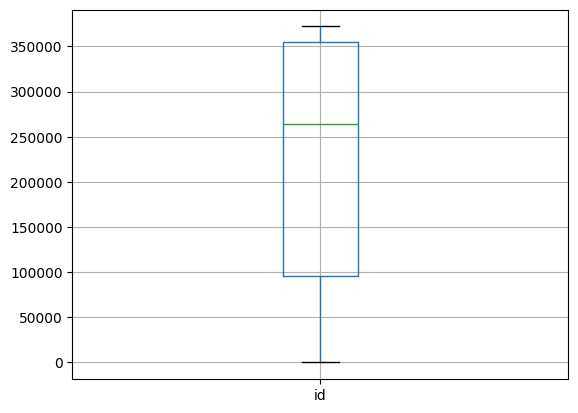

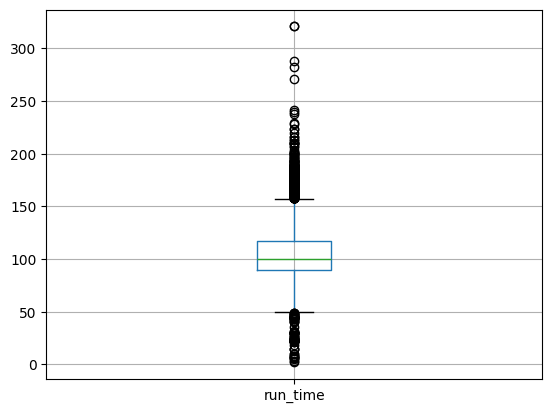

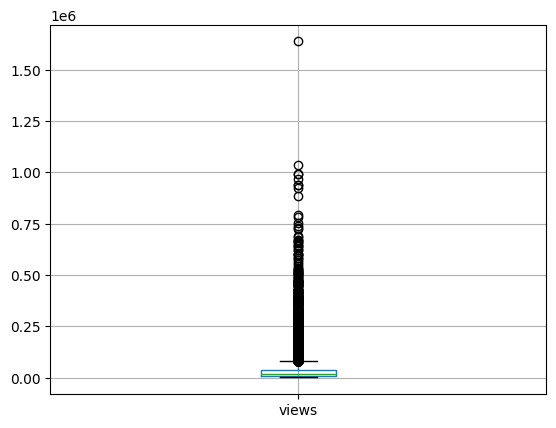

In [61]:
print('盒图\n')
for label in num_labels:
    data.boxplot(label)
    plt.show()

In [62]:
print('对缺失数据进行替补：')
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data != 0]
missing_data

对缺失数据进行替补：


IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
industry              1
language            546
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64

In [63]:
print('使用直接剔除方法：')
print('原始数据行数:', len(data))
drop_data = data.dropna(how='any')
print('将缺失部分剔除后数据行数:', len(drop_data))

使用直接剔除方法：
原始数据行数: 20548
将缺失部分剔除后数据行数: 9902


通过盒图对比新旧数据:


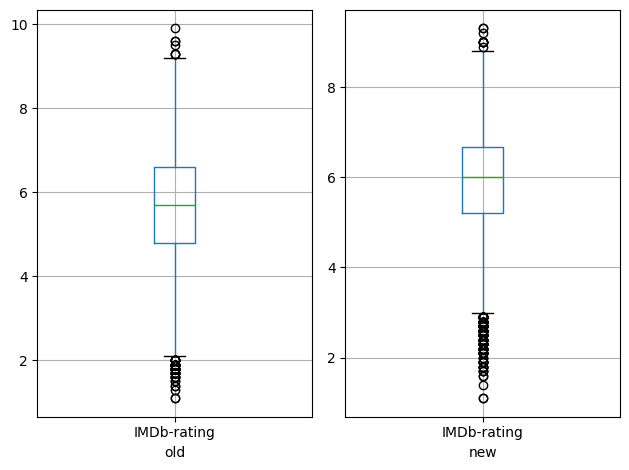

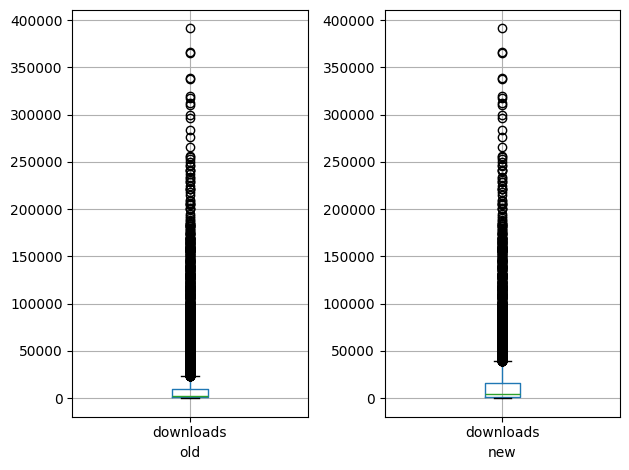

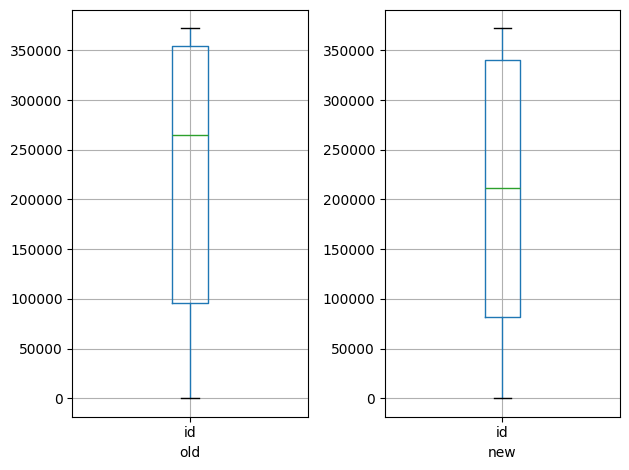

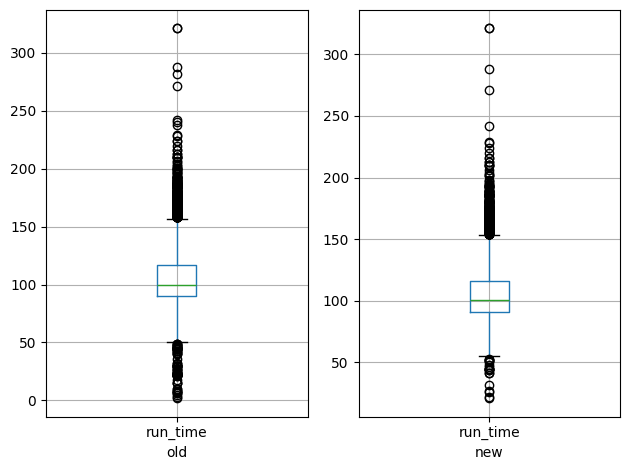

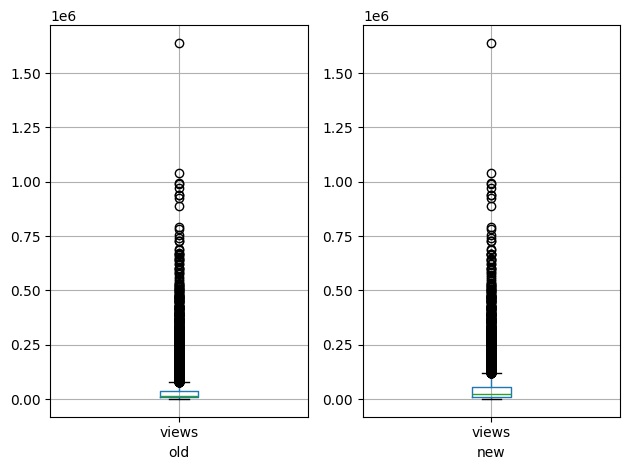

In [64]:
print('通过盒图对比新旧数据:')
for label in num_labels:
    plt.subplot(1, 2, 1)
    data.boxplot(label)
    plt.xlabel('old')
    plt.subplot(1, 2, 2)
    drop_data.boxplot(label)
    plt.xlabel('new')
    plt.tight_layout()
    plt.show()

In [65]:
print('显示剔除后是否还存在空值：')
drop_data.isna().sum()

显示剔除后是否还存在空值：


IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64

使用最高属性频率值来填充:
通过盒图对比新旧数据:
IMDb-rating 属性的最高频率值为: 6.6


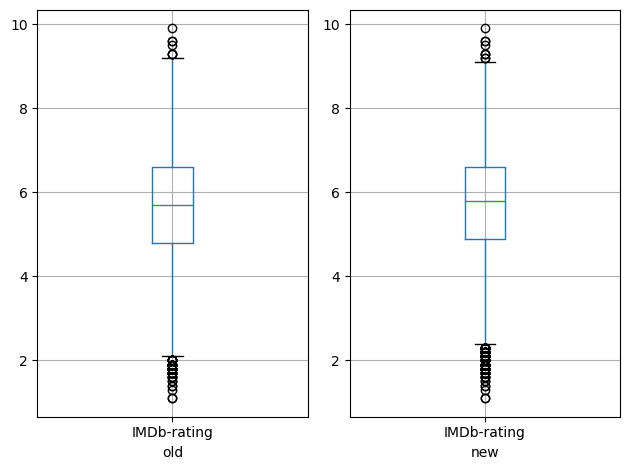

downloads 属性的最高频率值为: 75.0


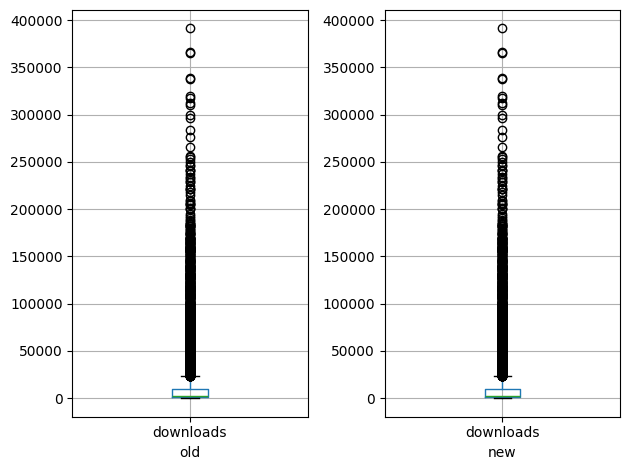

id 属性的最高频率值为: 371744


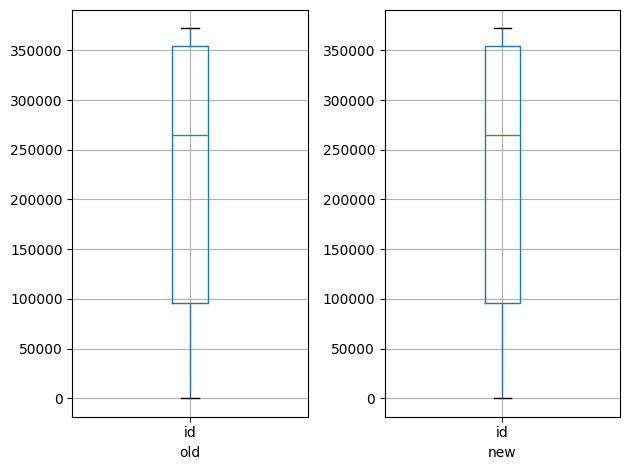

run_time 属性的最高频率值为: 90.0


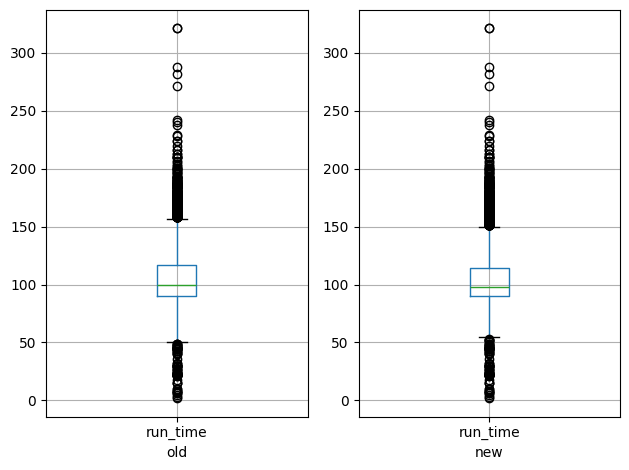

views 属性的最高频率值为: 6259.0


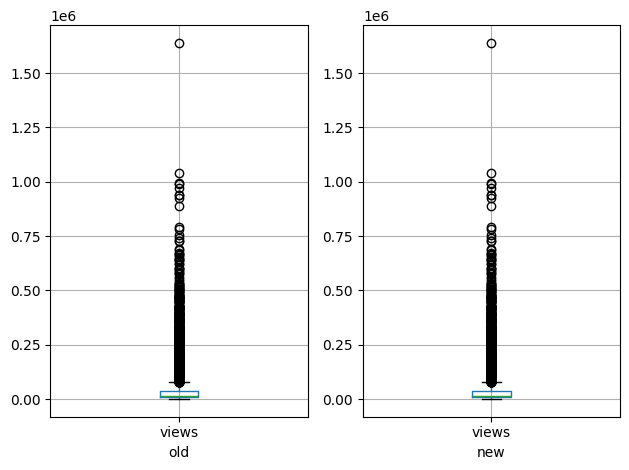

In [66]:
print('使用最高属性频率值来填充:')
print('通过盒图对比新旧数据:')
for label in num_labels:
    mode = data[label].mode()[0]
    new_data = data.fillna({label: mode})
    print(label, '属性的最高频率值为:', mode)

    plt.subplot(1, 2, 1)
    data.boxplot(label)
    plt.xlabel('old')
    plt.subplot(1, 2, 2)
    new_data.boxplot(label)
    plt.xlabel('new')
    plt.tight_layout()  # 调整整体空白
    plt.show()

In [67]:
print('通过属性的相关关系来填补缺失值')
print('相关关系矩阵:')
data[num_labels].corr()

通过属性的相关关系来填补缺失值
相关关系矩阵:


,IMDb-rating,downloads,id,run_time,views
IMDb-rating,1.000000,0.075541,0.048087,0.333974,0.067027
downloads,0.075541,1.000000,-0.246664,0.348147,0.947877
id,0.048087,-0.246664,1.000000,-0.107023,-0.183462
run_time,0.333974,0.348147,-0.107023,1.000000,0.327676
views,0.067027,0.947877,-0.183462,0.327676,1.000000


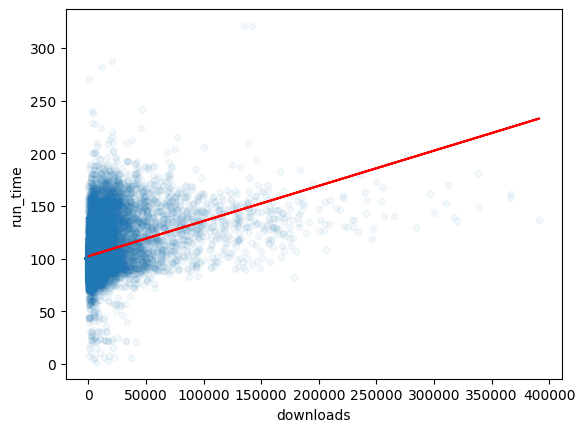

In [78]:
drop_data = data.dropna(subset=['run_time'])
x = drop_data['downloads']
y = drop_data['run_time']
x = np.array(x).reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
drop_data.plot(kind="scatter", x="downloads", y="run_time", alpha=0.05)
plt.plot(x, model.predict(x), 'r-')
# plt.ylim(0,300)
plt.show()

In [90]:
print('利用线性回归模型预测来填充run_time属性缺失的值')
new_data = data.copy()
for index, row in new_data[data['run_time'].isna()].head(5).iterrows():
    new_data['run_time'][index] = model.predict(np.array(row['downloads']).reshape(-1, 1))
print('\n填充后的数据:')
new_data[data['run_time'].isna()].head(5)

利用线性回归模型预测来填充run_time属性缺失的值

填充后的数据:


,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
10,6.2,NaN,Andrew Lawrence,742.0,372040,Hollywood / English,English,"18 Feb, 2023",Feb 03 2023,102.615738,Follows a couple who fall in love through thei...,Frankie Meets Jack,4618.0,"Jen Bashian, Samantha Cope, Joseph Lawrence"
12,NaN,NaN,NaN,2253.0,372038,Wrestling,English,"18 Feb, 2023",Feb 17 2023,103.120532,NaN,WWE Smackdown 2023-02-17,5468.0,NaN
16,NaN,NaN,NaN,2785.0,371990,Punjabi,Punjabi,"17 Feb, 2023",Feb 16 2023,103.298262,NaN,Sab Fadey Jaange.2023,12968.0,NaN
18,NaN,NaN,NaN,171.0,371988,Wrestling,English,"17 Feb, 2023",Feb 16 2023,102.424979,NaN,TNA.Impact 2023-02-16,667.0,NaN
22,5.0,NaN,Lindsay Hartley,465.0,371936,Hollywood / English,English,"16 Feb, 2023",Jan 29 2023,102.523198,When\r\n a woman is attacked in her short term...,Vacation Home Nightmare,5723.0,John F. Hayes


In [91]:
print('填充前的数据为:')
data[data['run_time'].isna()].head(5)

填充前的数据为:


,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
10,6.2,NaN,Andrew Lawrence,742.0,372040,Hollywood / English,English,"18 Feb, 2023",Feb 03 2023,NaN,Follows a couple who fall in love through thei...,Frankie Meets Jack,4618.0,"Jen Bashian, Samantha Cope, Joseph Lawrence"
12,NaN,NaN,NaN,2253.0,372038,Wrestling,English,"18 Feb, 2023",Feb 17 2023,NaN,NaN,WWE Smackdown 2023-02-17,5468.0,NaN
16,NaN,NaN,NaN,2785.0,371990,Punjabi,Punjabi,"17 Feb, 2023",Feb 16 2023,NaN,NaN,Sab Fadey Jaange.2023,12968.0,NaN
18,NaN,NaN,NaN,171.0,371988,Wrestling,English,"17 Feb, 2023",Feb 16 2023,NaN,NaN,TNA.Impact 2023-02-16,667.0,NaN
22,5.0,NaN,Lindsay Hartley,465.0,371936,Hollywood / English,English,"16 Feb, 2023",Jan 29 2023,NaN,When\r\n a woman is attacked in her short term...,Vacation Home Nightmare,5723.0,John F. Hayes


In [87]:
print('通过数据对象之间的相似性来填补缺失值')
full_data = data[data['run_time'].notna()]
new_data = data.copy()
consider_labels = ['downloads', 'views']
for i, row in list(new_data[data['run_time'].isna()].head(5).iterrows()):
    for label in consider_labels:
        tmp_data = full_data[full_data[label]==row[label]]
        if len(tmp_data) > 0:
            new_data['run_time'][i] = tmp_data['run_time'].mean()
            break

print('填充后的数据:')
new_data[data['run_time'].isna()].head(5)

通过数据对象之间的相似性来填补缺失值
填充后的数据:


,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
10,6.2,NaN,Andrew Lawrence,742.0,372040,Hollywood / English,English,"18 Feb, 2023",Feb 03 2023,91.166664,Follows a couple who fall in love through thei...,Frankie Meets Jack,4618.0,"Jen Bashian, Samantha Cope, Joseph Lawrence"
12,NaN,NaN,NaN,2253.0,372038,Wrestling,English,"18 Feb, 2023",Feb 17 2023,98.750000,NaN,WWE Smackdown 2023-02-17,5468.0,NaN
16,NaN,NaN,NaN,2785.0,371990,Punjabi,Punjabi,"17 Feb, 2023",Feb 16 2023,85.000000,NaN,Sab Fadey Jaange.2023,12968.0,NaN
18,NaN,NaN,NaN,171.0,371988,Wrestling,English,"17 Feb, 2023",Feb 16 2023,92.500000,NaN,TNA.Impact 2023-02-16,667.0,NaN
22,5.0,NaN,Lindsay Hartley,465.0,371936,Hollywood / English,English,"16 Feb, 2023",Jan 29 2023,91.833336,When\r\n a woman is attacked in her short term...,Vacation Home Nightmare,5723.0,John F. Hayes


In [92]:
print('填充前的数据为:')
data[data['run_time'].isna()].head(5)   

填充前的数据为:


,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
10,6.2,NaN,Andrew Lawrence,742.0,372040,Hollywood / English,English,"18 Feb, 2023",Feb 03 2023,NaN,Follows a couple who fall in love through thei...,Frankie Meets Jack,4618.0,"Jen Bashian, Samantha Cope, Joseph Lawrence"
12,NaN,NaN,NaN,2253.0,372038,Wrestling,English,"18 Feb, 2023",Feb 17 2023,NaN,NaN,WWE Smackdown 2023-02-17,5468.0,NaN
16,NaN,NaN,NaN,2785.0,371990,Punjabi,Punjabi,"17 Feb, 2023",Feb 16 2023,NaN,NaN,Sab Fadey Jaange.2023,12968.0,NaN
18,NaN,NaN,NaN,171.0,371988,Wrestling,English,"17 Feb, 2023",Feb 16 2023,NaN,NaN,TNA.Impact 2023-02-16,667.0,NaN
22,5.0,NaN,Lindsay Hartley,465.0,371936,Hollywood / English,English,"16 Feb, 2023",Jan 29 2023,NaN,When\r\n a woman is attacked in her short term...,Vacation Home Nightmare,5723.0,John F. Hayes
